In [1]:
%matplotlib inline
import pylab as plt
from astropy.io import fits
import fitsio
from astropy.stats import sigma_clip
import numpy as np
from glob import glob
from os.path import basename

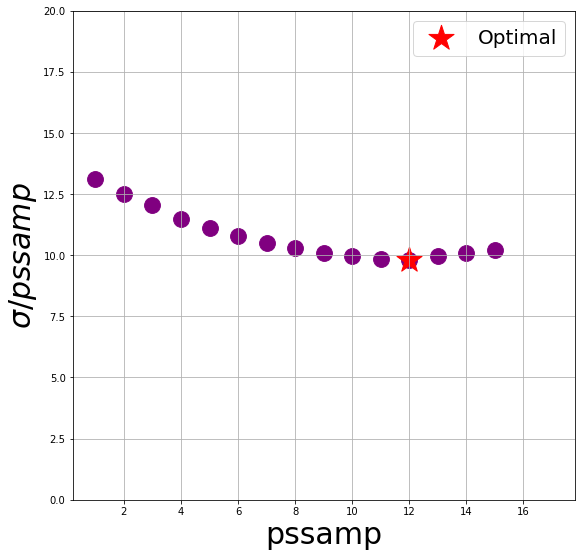

9.80134492277178
12.0


In [2]:
# Visualization of the optimal psamp, nssamp values that optimize the readout noise 

files=glob('path/to/input/*.fz')
files=np.sort(files)
hdu=1
nsamp=1

def get_pssamp(Files):
    pssamp_arr=list()
    for f in files:
        pssamp=float(basename(f).split('_')[4]) # Dpending on naming convention index might need to be changed 
        pssamp_arr.append(pssamp)
    
    return np.array(pssamp_arr)

def noise(Files):
    SD=list()
    for f in Files:
        raw=fitsio.FITS(f)
        nrow,ncol = raw[hdu].read().shape
        data = np.zeros((nrow,ncol,nsamp))
        for i in range(nsamp):
            data[:,:,i] = raw[hdu].read()
            OVS=data[:,370:].mean(axis=2).flatten()
            OVS =sigma_clip(OVS)
            sd=np.std(OVS)
            SD.append(sd)
    
    return SD

SD=noise(files)
pssamp=get_pssamp(files)

plt.figure(figsize=(9,9))
plt.scatter(pssamp,SD/(pssamp),s=250,marker='o',color='purple')
plt.scatter(pssamp[np.argmin(SD/(pssamp))],np.min(SD/(pssamp)),
            s=700,marker='*',color='red', label = "Optimal")
plt.xlabel("pssamp",fontsize=30)
plt.ylabel("$\sigma/pssamp$",fontsize=30)
plt.ylim(0,20)
plt.legend(loc='best', fontsize=20)
plt.grid()
plt.show()

print(np.min(SD/(pssamp)))
print(pssamp[np.argmin(SD/(pssamp))])


